# Unit 1: Needed Tools

## Contents
1.1 Jupyter

1.2 HDFS

1.3 YARN

1.4 Python: plotting data (optional)

# 1.1 Jupyter

"The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and explanatory text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, machine learning and much more." [jupyter.org](http://jupyter.org)

Jupyter has support for a lot of languages, in this course we will focus on Python:
* [Jupyter kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels)

To launch a Jupyter Notebook:

* Connect to one of the login nodes of the Hadoop 3 cluster:

    **ssh hadoop.cesga.es**

* OPTIONAL: Load the Spark and Python version you want to use:
  
  The default version of Spark is 2.4.0 using python 2.7.5, which is old, very old, but it is quite convenient for us.

  If you want to load a newer Spark version you can do it using:

      module load spark/3.4.3
  
  If you want to use Python 3 you can load any of the available anaconda3 versions using:

      module load anaconda3/2024.02-1

  You can see all the available versions with:

      module available
   
  In our case we will use Python 2 because it has a very useful feature called **tuple parameter unpacking** that was removed in Python 3 as explained in [PEP 3113](https://www.python.org/dev/peps/pep-3113/).
    
* Launch the Jupyter Notebook:

    start_jupyter
    
  We can also use the new **JupyterLab** interface instead of the classic Jupyter Notebook:

    **start_jupyter-lab**

* Open the provided URL in the browser


The notebook you have launched is tightly integrated with Spark in order to:
* Automatically open a spark session with the cluster
* Dynamically expand the required executors in the cluster

Leave the terminal open, because the console provides useful debugging information, showing Spark messages.

When you finish your interactive work remember to close the notebook properly:
* `File > Close and Halt` (Jupyter) 
* `File > Close and Shutdown Notebook` (JupyterLab)

And finally finish Jupyter in the terminal typing:
* Ctrl+c

Take into account that **the number of simultaneous interactive jobs per user is restricted:** you can only run at most two notebooks at the same time.

## Exercise 1.1.1
Connect to hadoop3.cesga.es and copy the course materials to your home directory:

    git clone https://github.com/javicacheiro/pyspark_course notebook
    
Start Jupyter and open the Unit 1 notebook.

# 1.2 HDFS

CESGA's Hadoop 3 platform has two main filesystems:
* HOME
* HDFS 

## HOME
The HOME directory is a NFS filesystem shared between all nodes of the cluster.

It is not intended to be used directly by the Spark applications.
* Store the configurations and common files
* Temporary storage to upload the datasets before moving them to HDFS
* Temporary storage to retrieve the results from HDFS before dowloading them to the local computer

**Keep in mind that it does not have backup.**

## HDFS
The Hadoop Distributed Filesystem (HDFS) is where you store the data that you are going to process with Spark applications.

* Best performance on large files (>100MB)
* Files in HDFS are of type write once
* HDFS is optimized for large sequential reads
* Data is distributed over multiple nodes
* Files are split in blocks: default block size is **128MB**
* Blocks are replicated across multiple nodes: default **3 replicas**

### Architecture
![HDFS Architecture](http://bigdata.cesga.es/tutorials/img/hdfsarchitecture.gif)

### Replication
![HDFS Replicas](http://bigdata.cesga.es/tutorials/img/hdfsreplicas.gif)



## HDFS basic commands

Upload a file from HOME to HDFS:

    hdfs dfs -put local_file.txt remote_file.txt

Download a file from HDFS to HOME:

    hdfs dfs -get remote_file.txt local_file.txt

List files in HDFS (both commands are equivalent):

    hdfs dfs -ls
    hdfs dfs -ls /user/<current_user>

List files in the HDFS root directory:

    hdfs dfs -ls /
   
Create a directory:

    hdfs dfs -mkdir testing

Delete a directory:

    hdfs dfs -rm -r -f testing
    
Delete a file:

    hdfs dfs -rm testing/file.txt
    
See the contets of a file:

    hdfs dfs -cat testing/file.txt

These commands should be enough for this course, for further information you can check [The HDFS Tutorial](http://bigdata.cesga.es/tutorials/hdfs.html#/) that we have prepared.

## Exercise 1.2.1

List the contents of your HDFS home directory

Upload the local datasets stored in:

    /opt/cesga/cursos/pyspark/datasets

to your home directory in HDFS.

    hdfs dfs -put /opt/cesga/cursos/pyspark/datasets
    
You can verify that the files have been uploaded with:

    hdfs dfs -ls datasets

# 1.3 YARN

### YARN Architecture
![YARN Architecture](http://bigdata.cesga.es/tutorials/img/yarn_architecture.gif)

### YARN basic commands
See the aggregated logs produced by a job:
    
    yarn logs -applicationId <applicationID> | less

View cluster information, including the list of running jobs:
    
    yarn top -users <username>

Kill an application (i.e. a job):

    yarn application -kill <applicationID>
    

These commands should be enough for this course, for further information you can check [The YARN Tutorial](http://bigdata.cesga.es/tutorials/yarn.html#/).

### Exercise 1.3.1
After starting Jupyter and opening a notebook, verify that there is a YARN application automatically running with your user.

### Questionaire
Complete the [Unit 1 questionaire](https://forms.gle/PiZMEGqP5HkttEz18).

# 1.4 Python: Plotting Data (optional)

## Matplotlib

In [1]:
 %matplotlib inline

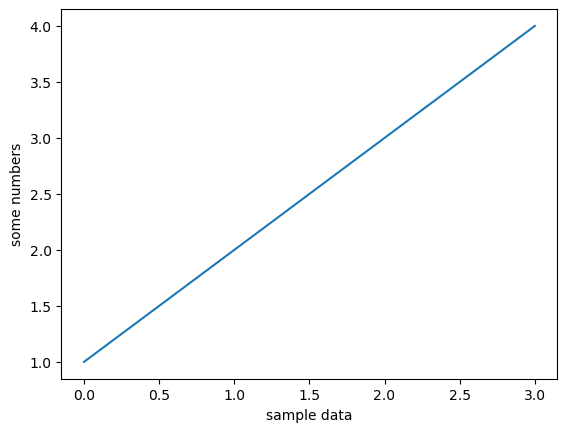

In [2]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.xlabel('sample data')
plt.ylabel('some numbers')
plt.show()

### Plotting a Pandas DataFrame

In [3]:
import pandas as pd
df = pd.DataFrame({'Message Type': ['Errors', 'Warnings','Info'], 'Count': [10, 1, 5]})

<Axes: xlabel='Message Type'>

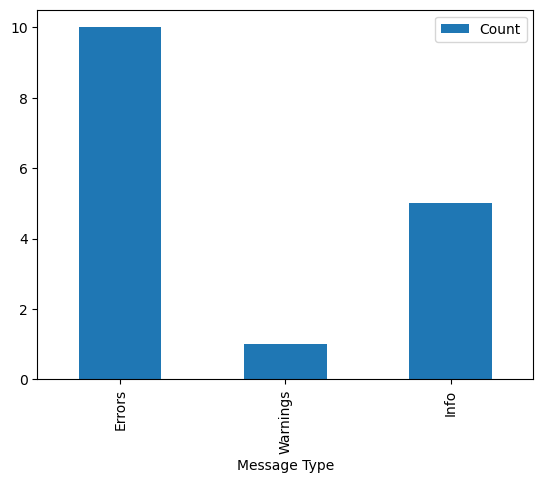

In [4]:
df.plot.bar(x='Message Type', y='Count')

## Bokeh

In [5]:
from bokeh.io import show, output_notebook
from bokeh.plotting import ColumnDataSource, figure
output_notebook()

Loading BokehJS ...

In [6]:
data_source = ColumnDataSource(data={
    'x': [1, 2, 3, 4, 5],
    'y': [3, 2, 1, 3, 4],
    'label': ['red', 'green', 'blue', 'yellow', 'brown']
})
p = figure(title='Test', 
           x_axis_label='Position', y_axis_label='Height',
           tooltips=[('(x,y)', '($x, $y)'), ('label', '@label')])
p.circle('x', 'y', fill_color='label', size=20, source=data_source)
p.line('x', 'y', source=data_source)
show(p)

### Plotting a Pandas DataFrame with Bokeh

In [7]:
import pandas as pd
df = pd.DataFrame({'Message Type': ['Errors', 'Warnings','Info'], 'Count': [10, 1, 5]})
p = figure(x_range=df['Message Type'], title='Messages by type', y_axis_label='Count')
p.vbar(x=df['Message Type'], top=df['Count'], width=0.9)
show(p)

## Exercise 1.4.1

Look into the exercises directory and complete the unit_1_plotting_data.ipynb notebook.